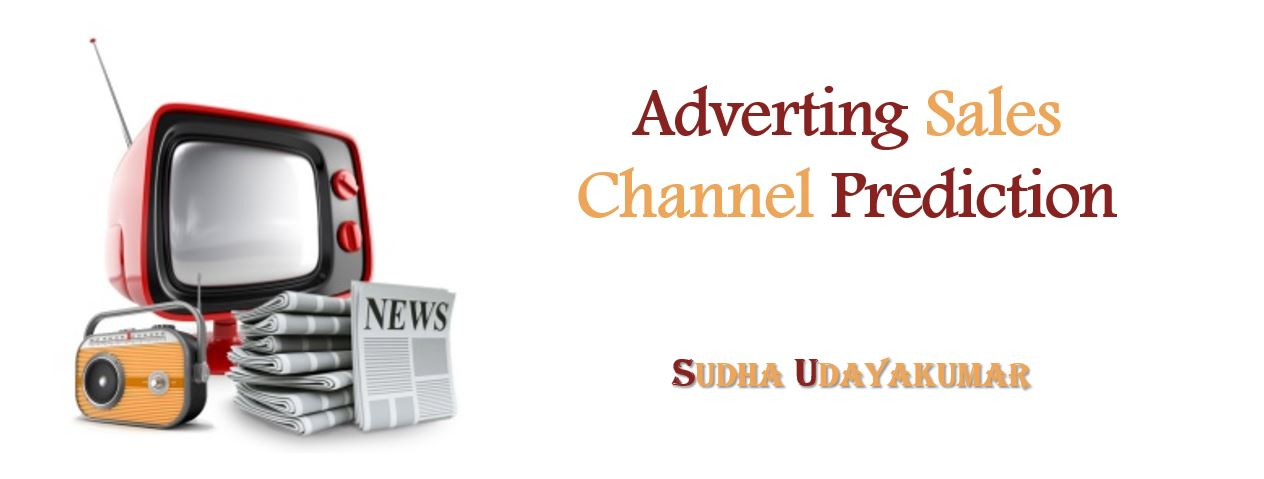

# Advertising Sales Channel Prediction

# Introduction (Problem Statement Given)

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

## Problem Statement Summarized

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. 

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

# Choosing Right Tools

## Importing and Installing Right Packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 5)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.4f}'.format  #usually kept at .2f, was changed to .4f as the diff between R2&CV was low
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling Warnings

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 4 # set the precision of floating point numbers.

# Loading Dataset

In [3]:
 # Importing training dataset using pd.read_csv from github. Not saving the file locally 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [4]:
#save the CSV file to a local folder, so that we can use it while uploading to Github & Then commenting it out 
#df.to_csv("AdvertisingSales.csv")

## Data Description

# Initial Analyis of Data

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1000,37.8000,69.2000,22.1000
1,2,44.5000,39.3000,45.1000,10.4000
2,3,17.2000,45.9000,69.3000,9.3000
3,4,151.5000,41.3000,58.5000,18.5000
4,5,180.8000,10.8000,58.4000,12.9000


<span style='background:yellow'>Observation:Data is loading properly and we can see all are numeric. So this would be a regression case study  </span>

In [6]:
df.shape

(200, 5)

<span style='background:yellow'>Observation: There are 200 rows and 5 columns </span>

In [7]:
df.nunique()


Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

<span style='background:yellow'>Observation: Unanamed looks like a serial number, and all other columns have multiple values, and so again makes sure it is not a classification problem  </span>

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<span style='background:yellow'>Observation: There are no missing values  </span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<span style='background:yellow'>Observation: As we saw earlier, there are no missing values. All are float column except unanamed</span>

In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.0000,200.0000,200.0000,200.0000,200.0000
mean,100.5000,147.0425,23.2640,30.5540,14.0225
std,57.8792,85.8542,14.8468,21.7786,5.2175
min,1.0000,0.7000,0.0000,0.3000,1.6000
25%,50.7500,74.3750,9.9750,12.7500,10.3750
50%,100.5000,149.7500,22.9000,25.7500,12.9000
75%,150.2500,218.8250,36.5250,45.1000,17.4000
max,200.0000,296.4000,49.6000,114.0000,27.0000


<span style='background:yellow'>Observation: No missing values. Mean is almost equal to median. Newspaper max value is very from 75th percentile, so have to check if there are outliers  </span>

In [11]:
df.skew()

Unnamed: 0    0.0000
TV           -0.0699
radio         0.0942
newspaper     0.8947
sales         0.4076
dtype: float64

<span style='background:yellow'>Observation: Skewnes range is -0.5 to +0.5 and only newspaper is skewed as expected from our above analysis. Lets look into the outliers and handle the skewness </span>

<span style='background:pink'>Notes: Since we are expecting to see outliers for newspaper, lets draw a seperate boxplot for newspaper and others we can group and display. same way our target column, we will draw a seperate box plot for "Sales"  </span>

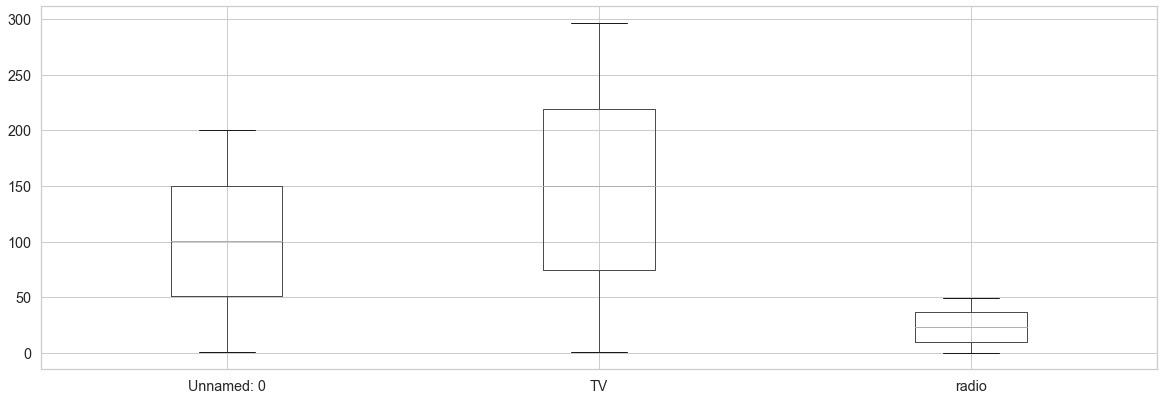

In [12]:
#plotting box plot for the 1st 5 columns
df.iloc[:,0:3].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<span style='background:yellow'>Observation: As expected there are no outliers </span>

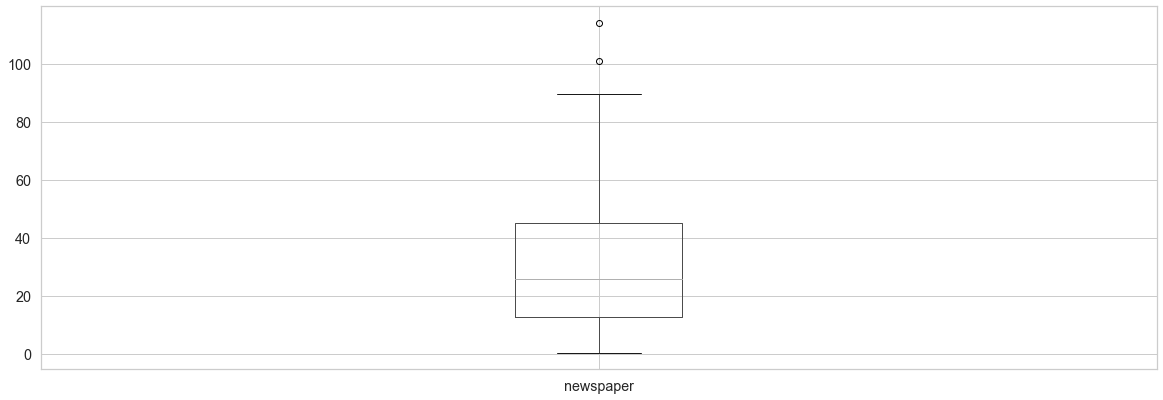

In [13]:
#plotting box plot for the 1st 5 columns
df.iloc[:,3:4].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<span style='background:yellow'>Observation: We have 2 bubbles, and they are slightly above the whiskers, so we might need to handle this outlier  </span>

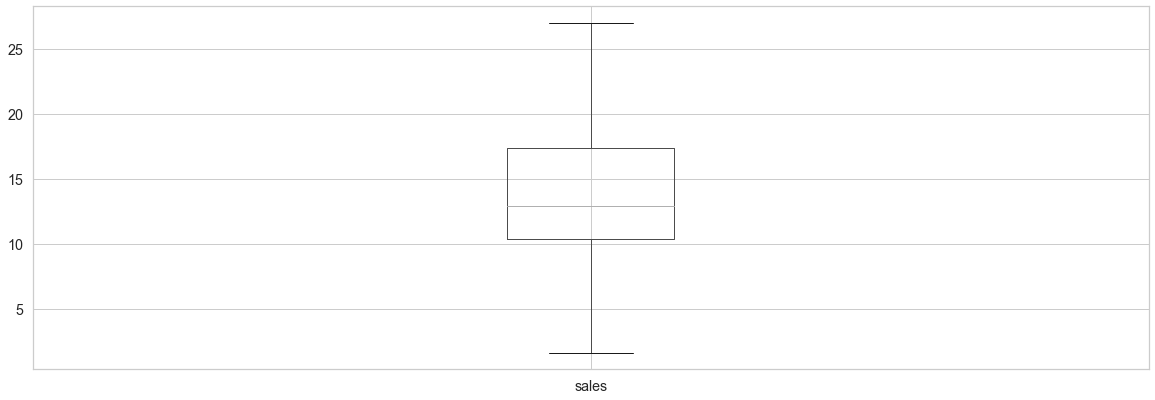

In [14]:
#plotting box plot for the 1st 5 columns
df.iloc[:,4:5].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<span style='background:yellow'>Observation: No outliers in the target column as well  </span>

# EDA

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

## Distribution of Features

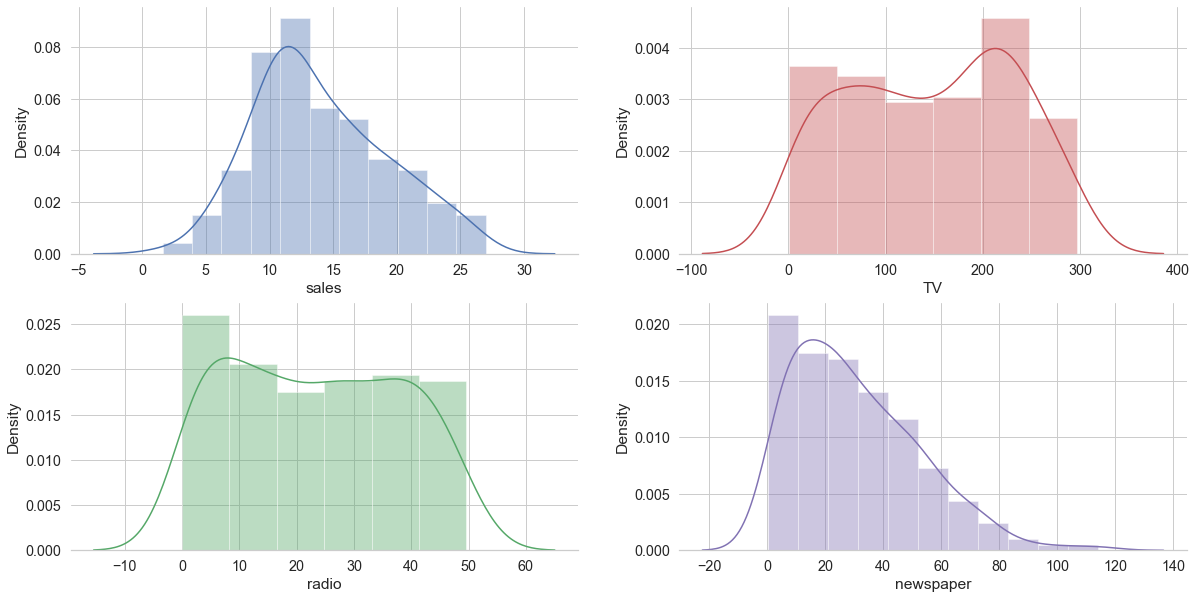

In [15]:
f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=False)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df.sales, color="b", ax=axes[0, 0])

sns.distplot(df.TV, color="r", ax=axes[0, 1])

sns.distplot(df.radio, color="g", ax=axes[1, 0])

sns.distplot(df.newspaper, color="m", ax=axes[1, 1])

<span style='background:yellow'>Observation: we can see the range is different for each TV has upto 400, newspaper 140 and radio only 60, so lets change that to see how they in the same range, to see more on sales .  </span>

<span style='background:yellow'>Observation: Newspaper is right skewed, so it means spending is low for higher amounts </span>

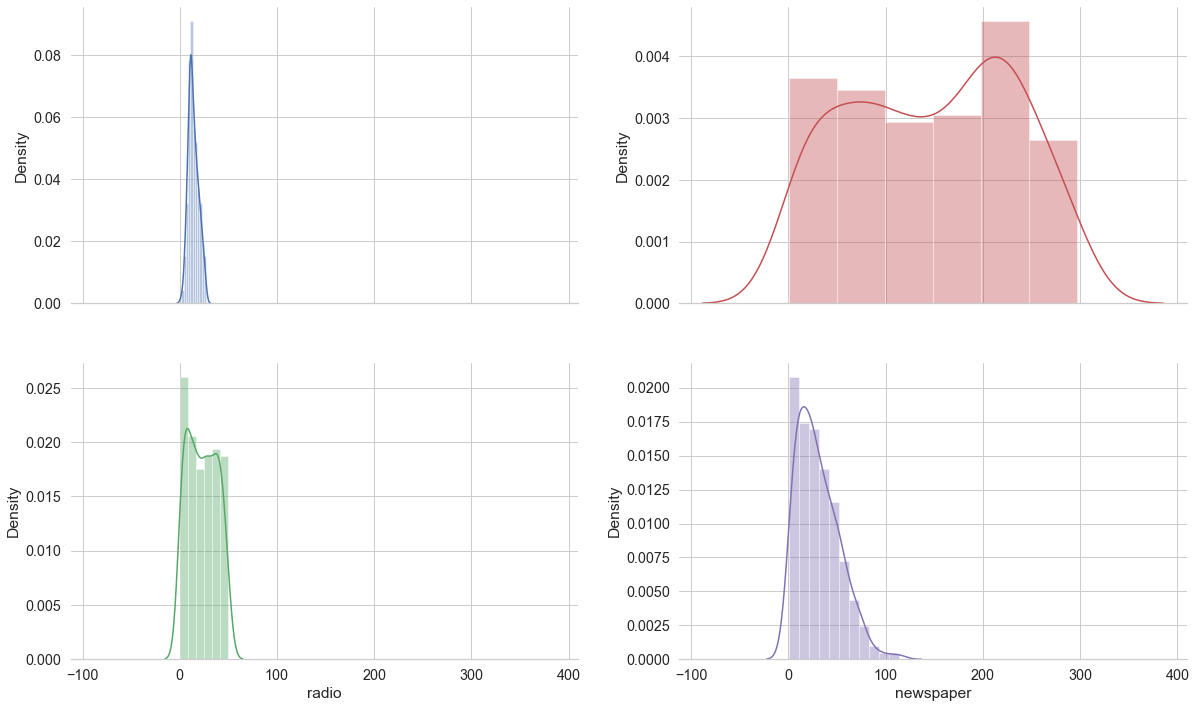

In [16]:
f, axes = plt.subplots(2, 2, figsize=(20,12), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df.sales, color="b", ax=axes[0, 0])

sns.distplot(df.TV, color="r", ax=axes[0, 1])

sns.distplot(df.radio, color="g", ax=axes[1, 0])

sns.distplot(df.newspaper, color="m", ax=axes[1, 1])

<span style='background:yellow'>Observation: By changing Sharex=True (since x is same, we can use this), now all 3 have come in the same scale. We can see that TV has the largest sale then newspaper last is radio  </span>

##  Is there a relationship between sales and spend various advertising channels?

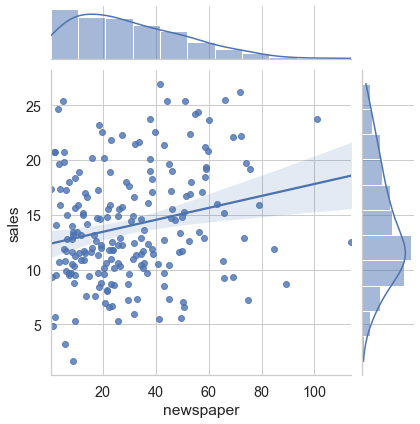

In [17]:
JG1 = sns.jointplot("newspaper", "sales", data=df, kind='reg')

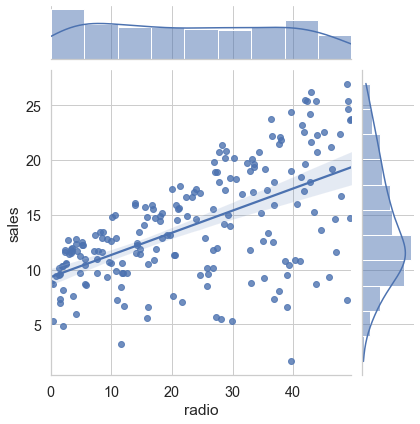

In [18]:
JG1 = sns.jointplot("radio", "sales", data=df, kind='reg')

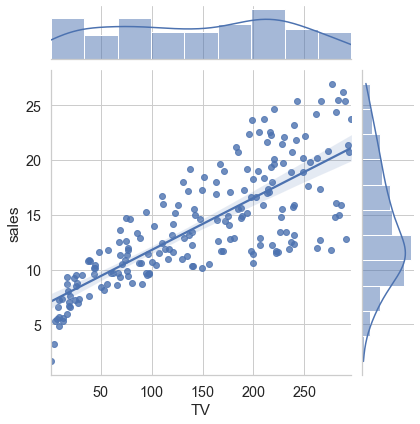

In [19]:
JG1 = sns.jointplot("TV", "sales", data=df, kind='reg')


<span style='background:yellow'>Observation:Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.  </span>

## Visualization as Pairs

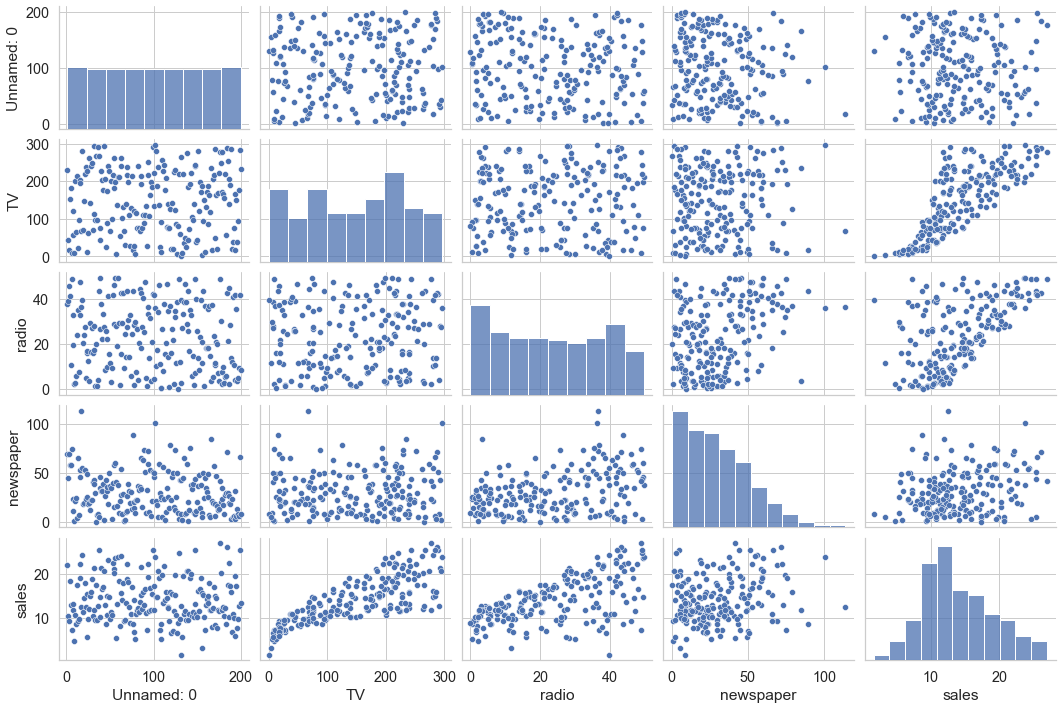

In [20]:
sns.pairplot(df, height = 2, aspect = 1.5)

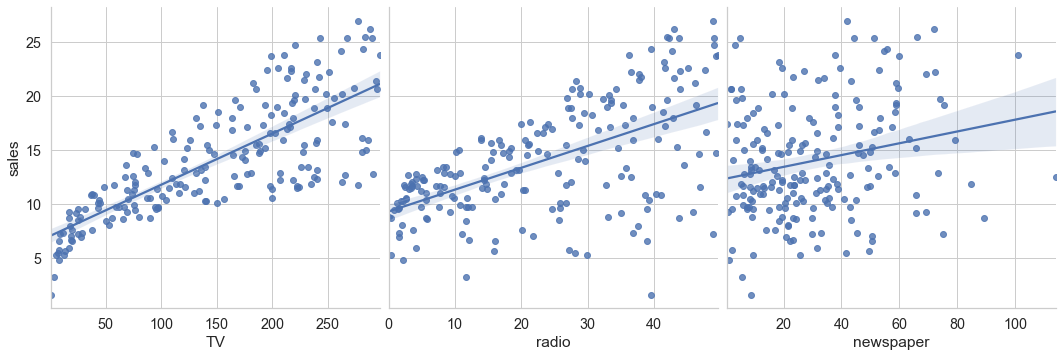

In [21]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

### Co-relation

In [22]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.0000,0.0177,-0.1107,-0.1549,-0.0516
TV,0.0177,1.0000,0.0548,0.0566,0.7822
radio,-0.1107,0.0548,1.0000,0.3541,0.5762
newspaper,-0.1549,0.0566,0.3541,1.0000,0.2283
sales,-0.0516,0.7822,0.5762,0.2283,1.0000


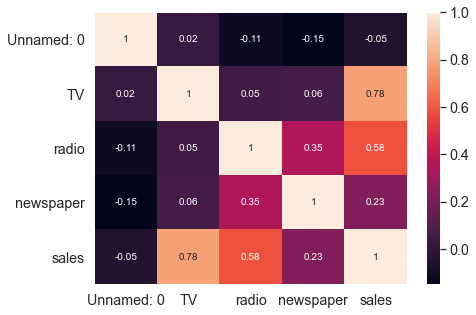

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.58__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.

# Pre-Processing Data

## Dropping Columns

In [24]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [25]:
df_new= df.drop("Unnamed: 0",axis=1)
df_new.head()

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000


<span style='background:yellow'>Observation: Since the Unanamed column, is acting more like a serial number we have dropped the column and checked if it is dropped as well.  </span>

## Outlier Removal

In [26]:
#abs is absolute value
#df [condition], whatever condition it matches, it retains and others are removed
#here z score <3, it is retained and Z> 3 is removed
from scipy.stats import zscore
z=np.abs(zscore(df_new))

df_out=df_new[(z<3).all(axis=1)]

In [27]:
df_out.shape

(198, 4)

In [28]:
df_new.shape

(200, 4)

In [29]:
(2/200)*100

1.0

<span style='background:yellow'>Observation: In the box plot chart, we saw outliers only for Newspaper and only 2 bubbles were seen. Now we have removed with Z score and as expected Only 1% of outliers are present and we have removed them  </span>

# Skewness

In [30]:
df_out.skew()
#Checking the skewness after outlier was removed

TV          -0.0823
radio        0.1148
newspaper    0.6501
sales        0.4071
dtype: float64

In [31]:
df.skew()
#checking the skewness of data, before outlier was removed for comparison

Unnamed: 0    0.0000
TV           -0.0699
radio         0.0942
newspaper     0.8947
sales         0.4076
dtype: float64

<span style='background:yellow'>Observation: There is a slight skewness for newspaper alone, even after the outlier removal (df_out). Before handling outliers the skewness for newspaper is 0.89 and after outlier removal it is at 0.65. So we need to handle this </span>

# Processing Data for Model Building

<span style='background:pink'>Note: Now we have to handle skewness only for the features "newspaper" and also do standard scaling of the features. So lets split the data and work on it  </span>

## Handling Skewness via Power Transform

In [32]:
df_skew=df_out.drop("sales",axis=1)
#we have created a new dataframe called df_skew to handle skewness and dropped the target variable "sales"

In [33]:
df_skew.skew()
#checking the skewness

TV          -0.0823
radio        0.1148
newspaper    0.6501
dtype: float64

<span style='background:yellow'>Observation: Checking the skewness after removing the target column, we see newspaper is still skewed </span>

In [34]:
from sklearn.preprocessing import power_transform
skew_new=power_transform(df_skew)

skew_new=pd.DataFrame(skew_new,columns=df_skew.columns)
#we are applying power trasnfrom to the feature to handle the skewness. 
#Since there are negative values using log or boxcox wont work, so that is why we have choosed power transform

In [35]:
skew_new.skew()
#checking the skewness of the features after using power_transform

TV          -0.3207
radio       -0.2367
newspaper   -0.1013
dtype: float64

<span style='background:yellow'>Observation: Our skewness of features are within range -0.5 to +0.5 so we are good to use this data </span>

## Standard Scalar

In [36]:
skew_new.describe()

,TV,radio,newspaper
count,198.0000,198.0000,198.0000
mean,0.0000,-0.0000,0.0000
std,1.0025,1.0025,1.0025
min,-2.0332,-1.9850,-2.2758
25%,-0.7687,-0.8085,-0.7704
50%,0.1237,0.0938,0.0058
75%,0.8409,0.8921,0.7925
max,1.5603,1.5482,2.1394


In [37]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.0000,200.0000,200.0000,200.0000,200.0000
mean,100.5000,147.0425,23.2640,30.5540,14.0225
std,57.8792,85.8542,14.8468,21.7786,5.2175
min,1.0000,0.7000,0.0000,0.3000,1.6000
25%,50.7500,74.3750,9.9750,12.7500,10.3750
50%,100.5000,149.7500,22.9000,25.7500,12.9000
75%,150.2500,218.8250,36.5250,45.1000,17.4000
max,200.0000,296.4000,49.6000,114.0000,27.0000


<span style='background:yellow'>Observation: When we compare the describe of original dataframe (df) and the dataframe (skew_new- after handling outliers and skewness), we see the data is also transformed and we dont have to do standard scalar. Check the min and max values and they look fine, so we can directly go to model building</span>

# Model Building

## Importing Libraries for Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

## Splitting into Train & Test data

In [39]:
x=skew_new
y=df_out["sales"]
x.head()

,TV,radio,newspaper
0,0.9560,0.9691,1.6042
1,-1.1920,1.0462,0.8310
2,-1.6461,1.3730,1.6071
3,0.1429,1.1473,1.2838
4,0.4565,-0.7350,1.2806


In [40]:
y.head()

0   22.1000
1   10.4000
2    9.3000
3   18.5000
4   12.9000
Name: sales, dtype: float64

### Finding Best Random State

In [41]:

maxAccu=0
BestRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)    
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        BestRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",BestRs)

Best accuracy is  0.9473362332441402 on Random_state   90


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=BestRs)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [43]:
lm=LinearRegression()
ridge = Ridge()
gb= GradientBoostingRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
knn = KNeighborsRegressor()

In [44]:
modelList=[("Lin Reg", lm), ("Ridge", ridge),("Gradient boost",gb),("Decision Tree", dt),("Random Forest",rf),("Kneigbor",knn)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=BestRs)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        error=modelInstance.score(x_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,x,y,cv=5,scoring='r2').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "CrossValidation":modelCrossval,
                         "R2CVDiff":R2CVDiff
                          })
    return df_acc
GetAccuracy(x,y,modelList)
    

,Name,Error,R2,MAE,MSE,RMSE,CrossValidation,R2CVDiff
0,Lin Reg,0.8892,0.9460,0.9633,1.4301,1.1959,0.8958,0.0502
1,Ridge,0.8892,0.9449,0.9707,1.4602,1.2084,0.8959,0.0490
2,Gradient boost,0.9989,0.9750,0.6607,0.6629,0.8142,0.9782,-0.0033
3,Decision Tree,1.0000,0.9550,0.8400,1.1912,1.0914,0.9509,0.0041
4,Random Forest,0.9963,0.9770,0.6418,0.6102,0.7811,0.9757,0.0012
5,Kneigbor,0.9516,0.9349,0.8480,1.7253,1.3135,0.9435,-0.0086


<span style='background:yellow'>Observation: The diff betwee R2 score and CV, is very minimal for all models. Couldnt find the diff with 2 decimal values, so increased it to 4 decimal values to find the diff. For all models the diff is less than 0.5. Since they are so close, we can use  Random Forest or Gradient boost which are the least. But Random forest has lower diff between R2 and  CV, so lets use Random Forest for Hyper Parameter Tuning </span>

# Hyper Parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters ={"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "criterion" : ["mse", "mae"],
             }

In [47]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [48]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(6, 11)})

In [49]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [58]:
mod=RandomForestRegressor(bootstrap= True, criterion='mse',max_depth=5,min_samples_leaf = 1, min_samples_split =6)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred))

0.9784926967150714


<span style='background:yellow'>Observation: Earlier with RandomForest  it was at 97%, now it is at 98% (round off), our hyperparameter tuning has improved the r2score </span>

# Saving the Model

## Joblib Saving

In [51]:
#will save the model using both types. Ones is good enough, just for academics practice saving with both
import joblib
joblib.dump(mod,"advertising.pkl")

['advertising.pkl']

## Pickle Saving

In [52]:
import pickle
filename= "advertising1.pkl"
pickle.dump(mod,open(filename,"wb"))

# Loading the Model

In [53]:
model=joblib.load("advertising.pkl")

In [54]:
prediction=model.predict(x_test)

In [55]:
print(r2_score(y_test,pred))

0.9829333092289014


In [56]:
prediction=pd.DataFrame(prediction) #converting to a Data Frame

In [57]:
prediction.head()  #checking the top 5 values, to double check fi there are predictions

,0
0,17.4670
1,6.5360
2,23.2200
3,19.3290
4,15.9570


# Summary